In [5]:
import pandas as pd
import os

# Define dataset path
data_path = "D:/traffic_data"

# Load CSV files
meta_df = pd.read_csv(f"{data_path}/Meta.csv")
train_df = pd.read_csv(f"{data_path}/Train.csv")
test_df = pd.read_csv(f"{data_path}/Test.csv")

# Display basic information
print("Meta Data:")
print(meta_df.info(), "\n", meta_df.head())

print("\nTrain Data:")
print(train_df.info(), "\n", train_df.head())

print("\nTest Data:")
print(test_df.info(), "\n", test_df.head())


Meta Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Path     43 non-null     object
 1   ClassId  43 non-null     int64 
 2   ShapeId  43 non-null     int64 
 3   ColorId  43 non-null     int64 
 4   SignId   42 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.8+ KB
None 
           Path  ClassId  ShapeId  ColorId SignId
0  Meta/27.png       27        0        0   1.32
1   Meta/0.png        0        1        0   3.29
2   Meta/1.png        1        1        0   3.29
3  Meta/10.png       10        1        0   3.27
4  Meta/11.png       11        0        0   1.22

Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi

In [6]:
# Define train folder path
train_folder = os.path.join(data_path, "Train")

# List classes (subdirectories inside Train)
classes = sorted(os.listdir(train_folder))
print(f"Total Classes: {len(classes)}")
print("Classes:", classes)

Total Classes: 43
Classes: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [7]:
# Count images in each class
class_counts = {cls: len(os.listdir(os.path.join(train_folder, cls))) for cls in classes}
print("Number of images per class:", class_counts)


Number of images per class: {'0': 1260, '1': 2220, '10': 2010, '11': 1320, '12': 2100, '13': 2160, '14': 4680, '15': 3780, '16': 2520, '17': 1110, '18': 1200, '19': 1260, '2': 2250, '20': 2160, '21': 1980, '22': 2340, '23': 3060, '24': 1620, '25': 1500, '26': 3600, '27': 1440, '28': 3240, '29': 1620, '3': 1410, '30': 2700, '31': 4680, '32': 1440, '33': 4134, '34': 2520, '35': 1200, '36': 2340, '37': 1260, '38': 2070, '39': 1800, '4': 1980, '40': 2160, '41': 1440, '42': 1440, '5': 1860, '6': 2520, '7': 1440, '8': 1410, '9': 1470}


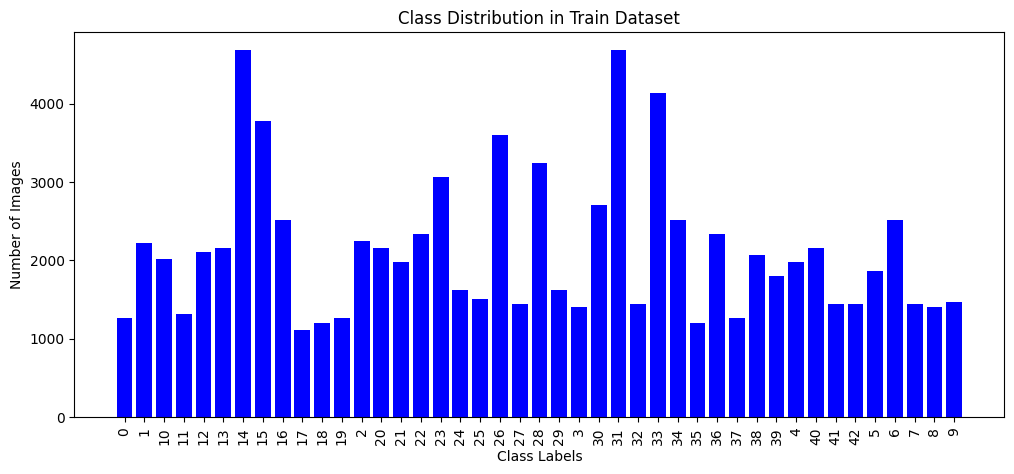

In [8]:
import matplotlib.pyplot as plt

# Bar plot for class distribution
plt.figure(figsize=(12, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='blue')
plt.xticks(rotation=90)
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Train Dataset")
plt.show()

In [2]:
pip install imgaug



  Obtaining dependency information for imgaug from https://files.pythonhosted.org/packages/66/b1/af3142c4a85cba6da9f4ebb5ff4e21e2616309552caca5e8acefe9840622/imgaug-0.4.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for Shapely from https://files.pythonhosted.org/packages/27/57/8ec7c62012bed06731f7ee979da7f207bbc4b27feed5f36680b6a70df54f/shapely-2.0.7-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/948.0 kB ? eta -:--:--
   --- ------------------------------------ 92.2/948.0 kB 2.6 MB/s eta 0:00:01
   --------- ------------------------------ 225.3/948.0 kB 2.3 MB/s eta 0:00:01
   ----------------- ---------------------- 409.6/948.0 kB 2.9 MB/s eta 0:00:01
   ------------------------ --------------- 573.4/948.0 kB 3.3 MB/s eta 0:00:01
   --------------------------------- ------ 798.7/948.0 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 948.0/948.0 kB 3.5 MB/s eta 0:00:00
   -------------------------------------


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import os
import shutil
import random
import cv2
import numpy as np
from imgaug import augmenters as iaa

# Define dataset path
data_path = "D:/traffic_data"
train_folder = os.path.join(data_path, "Train")
balanced_folder = os.path.join(data_path, "Balanced_Train")  # New folder for balanced data

# Create Balanced_Train directory
if not os.path.exists(balanced_folder):
    os.makedirs(balanced_folder)

# List classes
classes = sorted(os.listdir(train_folder))
print(f"Total Classes: {len(classes)}")
print("Classes:", classes)

# Set target number of images per class
TARGET_IMAGES = 3000

# Define augmentation sequence
aug = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flip
    iaa.Affine(rotate=(-10, 10)),  # Rotate images
    iaa.Multiply((0.8, 1.2)),  # Change brightness
])

# Process each class
for class_name in classes:
    class_path = os.path.join(train_folder, class_name)
    images = os.listdir(class_path)
    num_images = len(images)

    # Create class folder in balanced dataset
    new_class_path = os.path.join(balanced_folder, class_name)
    if not os.path.exists(new_class_path):
        os.makedirs(new_class_path)

    print(f"Processing Class {class_name}: {num_images} images")

    # Downsampling: If more than TARGET_IMAGES, randomly select 3000
    if num_images > TARGET_IMAGES:
        selected_images = random.sample(images, TARGET_IMAGES)
        for img_name in selected_images:
            shutil.copy(os.path.join(class_path, img_name), os.path.join(new_class_path, img_name))

    # Upsampling: If less than TARGET_IMAGES, augment images
    else:
        for img_name in images:
            shutil.copy(os.path.join(class_path, img_name), os.path.join(new_class_path, img_name))

        # Generate additional images to reach TARGET_IMAGES
        while len(os.listdir(new_class_path)) < TARGET_IMAGES:
            img_name = random.choice(images)
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                img_aug = aug.augment_image(img)
                aug_img_name = f"aug_{random.randint(10000, 99999)}.png"
                cv2.imwrite(os.path.join(new_class_path, aug_img_name), img_aug)

print("Dataset balancing completed! Balanced data is saved in:", balanced_folder)


Total Classes: 43
Classes: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']
Processing Class 0: 1260 images
Processing Class 1: 2220 images
Processing Class 10: 2010 images
Processing Class 11: 1320 images
Processing Class 12: 2100 images
Processing Class 13: 2160 images
Processing Class 14: 4680 images
Processing Class 15: 3780 images
Processing Class 16: 2520 images
Processing Class 17: 1110 images
Processing Class 18: 1200 images
Processing Class 19: 1260 images
Processing Class 2: 2250 images
Processing Class 20: 2160 images
Processing Class 21: 1980 images
Processing Class 22: 2340 images
Processing Class 23: 3060 images
Processing Class 24: 1620 images
Processing Class 25: 1500 images
Processing Class 26: 3600 images
Processing Class 27: 1440 images
Processing Class 28: 3240 images
P

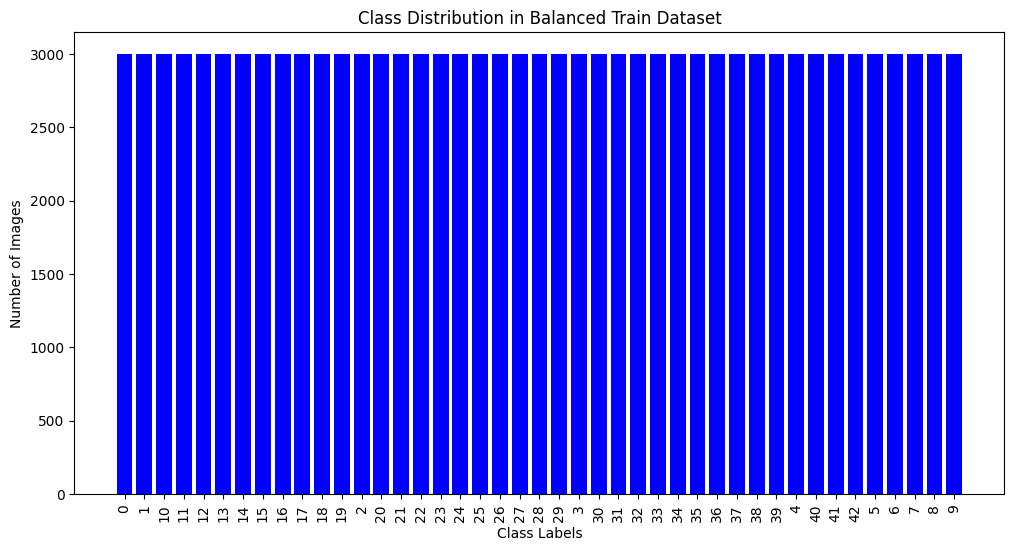

In [11]:
# -----------------------------------------------
# Visualization of Balanced Data Distribution
# -----------------------------------------------
class_counts = {cls: len(os.listdir(os.path.join(balanced_folder, cls))) for cls in classes}

# Plot the class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='blue')
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Balanced Train Dataset")
plt.xticks(rotation=90)
plt.show() 

In [33]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define dataset paths
train_folder = r"D:\traffic_data\Balanced_Train"
test_folder = r"D:\traffic_data\Test" 

In [42]:
# Image size for both models
IMG_SIZE = (224, 224)  # Required for VGG16 and ZFNet
BATCH_SIZE = 16  # Adjust based on available memory
EPOCHS = 5  # Number of training epochs
NUM_CLASSES = 43  # Total number of traffic sign classes


Found 129000 images belonging to 43 classes.
Found 12630 validated image filenames.
Loaded test batch shape: (16, 224, 224, 3)


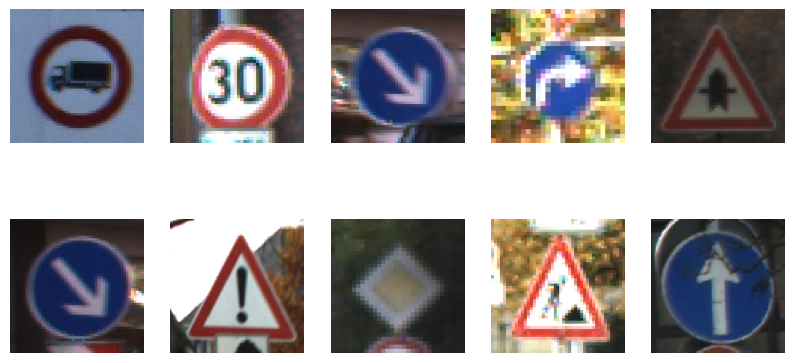

In [43]:
# Image data augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Only rescaling for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load train dataset
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
# Create DataFrame for test images
test_images = [os.path.join(test_folder, img) for img in os.listdir(test_folder) if img.endswith(('.png', '.jpg', '.jpeg'))]
test_df = pd.DataFrame({'filename': test_images})

# Load test dataset using flow_from_dataframe()
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=None,  # No labels for test data
    shuffle=False
)

# Verify test data loading
batch = next(test_generator)
print(f"Loaded test batch shape: {batch.shape}")

# Display some test images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(batch[i])
    plt.axis("off")
plt.show()



In [45]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D

IMG_SIZE = (224, 224)  # Keep this for VGG16

# Load VGG16 with correct input size
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base_model.trainable = False  # Freeze base model to speed up training

# Build model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')  # 43 classes for traffic signs
])

# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(
    train_generator,
    epochs=5,  # Reduced epochs for faster training
    validation_data=test_generator
)
 

Epoch 1/5
 151/8063 ━━━━━━━━━━━━━━━━━━━━ 3:13:00 1s/step - accuracy: 0.0306 - loss: 3.8442

KeyboardInterrupt: 

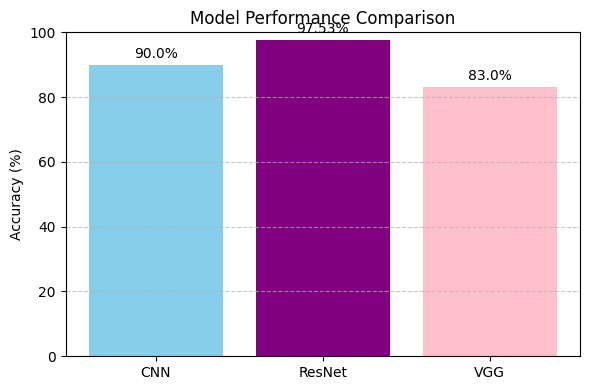

In [5]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['CNN', 'ResNet', 'VGG']
accuracies = [90, 97.53, 83]

# Plotting
plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=['skyblue', 'purple', 'pink'])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Model Performance Comparison')

# Annotate bars with accuracy values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # Offset text slightly above bar
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
